In [1]:
from wanpy.wpythtb import *
from pythtb import *
from models import Haldane

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

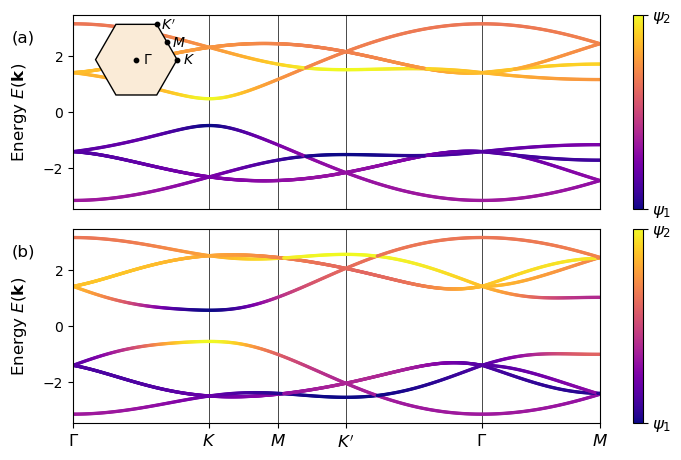

In [2]:
### geometry of model ###
n_super_cell = 2
ref_model = Haldane(1, 1, 1).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

n_orb = ref_model.get_num_orbitals()
lat_vecs = ref_model.get_lat()
orb_vecs = ref_model.get_orb()

n_occ = int(n_orb/2)
low_E_sites = np.arange(0, n_orb, 2)
high_E_sites = np.arange(1, n_orb, 2)

fig, axs = plt.subplots(2, 1, gridspec_kw={'hspace':0.1}, sharex=True)

### plot bands ###
delta = 1
t = -1
t2_triv = -0.1
t2_top = -0.3

k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')

# trivial bands
model_triv = Haldane(delta, t, t2_triv).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
model_triv.plot_bands(
    k_path, nk=501, scat_size=2, red_lat_idx=high_E_sites, fig=fig, ax=axs[0], cmap='plasma'
    )

axs[0].xaxis.set_ticks_position('none')

u_wfs_full = wf_array(model_triv, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern_triv_bot = u_wfs_full.berry_flux([0])/(2*np.pi)
chern_triv_top = u_wfs_full.berry_flux([1])/(2*np.pi)
# axs[0].text(1.7, 1.8, r'$C=0$', size=10)
# axs[0].text(1.7, -2, r'$C=0$', size=10)

axs[0].text(-.15, 2.5, '(a)', size=12)

# topological bands
model_top = Haldane(delta, t, t2_top).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
model_top.plot_bands(
    k_path, nk=501, k_label=label, scat_size=2, red_lat_idx=high_E_sites, fig=fig, ax=axs[1], cmap='plasma'
    )

u_wfs_full = wf_array(model_top, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern_top_bot = u_wfs_full.berry_flux([0])/(2*np.pi)
chern_top_top = u_wfs_full.berry_flux([1])/(2*np.pi)
# axs[1].text(1.7, 1.8, r'$C=-1$', size=10)
# axs[1].text(1.7, -2, r'$C=+1$', size=10)

axs[1].text(-.15, 2.5, '(b)', size=12)

### Brillouin zone inset ###
inset_ax = axs[0].inset_axes([-0.08, 0.57, 0.4, 0.4])  # [x0, y0, widthx, widthy]

a = n_super_cell # Lattice constant
s = 4 * np.pi / (3 * a) # Size of the Brillouin zone
# Angles for hexagon vertices
theta = np.linspace(0, 2 * np.pi, 7)[:-1]
# Hexagon vertices
x = s * np.cos(theta)
y = s * np.sin(theta)
# Plot hexagon
inset_ax.fill(x, y, 'antiquewhite', edgecolor='k')

# high-symmetry points
recip_vecs = ref_model.get_recip_lat_vecs()
k_pts = k_path @ recip_vecs
k_path = np.array([[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]])
label = [r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$']
k_pts = k_path @ recip_vecs

for i in range(4):
    inset_ax.scatter(k_pts[i,0], k_pts[i,1], s=10, zorder=2, c='k')
    inset_ax.text(k_pts[i,0]+(1/a)*1.2, k_pts[i,1], label[i], fontsize=10, ha='center', va='center')

inset_ax.axis('equal')
inset_ax.set_xticks([])
inset_ax.set_yticks([])
inset_ax.set_axis_off()

# adjust to remove white space
plt.subplots_adjust(top=0.95, bottom=0.1, left=0.101, right=1.13)

save_name = f'Delta={delta}_t={t}_t2_top={t2_top}_t2_triv={t2_triv}_n_occ={n_occ}'

plt.savefig(f'images/Haldane_bands_{save_name}.png', dpi=700)
plt.show()